# Rectangular Waves

Suppose we were to pulse (periodically turn on and off) a 9 volt battery by periodically closing the circuit it is attached to for $a$ seconds and then opening the circuit for $b$ seconds.

The voltage waveform created by doing this will have an amplitude of $9$ volts and a period, denoted as '$p$', given by:  

$$ p = a + b = 2L = \frac{1}{f}$$

The frequency ($f$) is of course given by:
$$ f = \frac{1}{p} = \frac{1}{2L}$$

## Square Waves

Assuming $a=b$, our waveform has a duty cycle of $50\mathrm{\%}$ and is a square wave.

### Fourier Series

The Fourier Series that gives the voltage running accross the circuit at any point in time ($t$) is given by:

$$ \mathrm{f}(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} b_n \, \sin \frac{n \pi t}{L}$$

Where
$$ a_0 = \frac{1}{L}\int_0^p \mathrm{f}(t) \, \mathrm{d}t =\frac{1}{L} \int_0^L \mathrm{f}(t)\,\mathrm{d}t = 9 \mathrm{V}$$

and,
$$ b_n = \frac{1}{L}\int_0^L \mathrm{f}(t) \, \sin \frac{n \pi t}{L} \, \mathrm{d}t$$

Note that all of the $a_n$ coefficients are equal to zero.

The **dc component** ($a_0$) is given by:  

$$ a_0 = \frac{1}{L}\int_0^p \mathrm{f}(t)\,\mathrm{d}t = E = 9\mathrm{V}$$

When $n$ is even, $b_n = 0$.

And, $\mathrm{f}(t)$ is equal to the magnitude or amplitude -- $E = 9\mathrm{V}$ -- of the voltage signal throughout the range of the integral in the identity of $b_n$, which is $[0, L]$.  Thus,

$$ b_n = \frac{E}{L}\int_0^L \sin \frac{n \pi t}{L} \, \mathrm{d}t$$

To find the integral in the above equation for any $n$, we first need to find the primitive integral.

$$ g(t) := \int \sin \frac{n \pi t}{L} \, \mathrm{d}t$$

$$ g(t) = - \frac{L}{n\pi} \, \cos \frac{n\pi t}{L} + K$$

Some relevant generalizations:

$$ g(0) = K - \frac{L}{n\pi}$$

$$ g(L) = \frac{L}{n \pi} + K \quad \text{where }n\text{ is odd.}$$

Finally,

$$ b_n = \frac{E}{L} \big(g(L)-g(0) \big) = 2\frac{E}{L} \, \frac{L}{n\pi} = \frac{2E}{n\pi} \quad \text{where }n\text{ is odd.}$$

**Parametric Approximation:**

Below is a function that approximates the square wave using every odd numbered harmonic up to, but not including, $m$.

$$ \mathrm{f}(t \vert m) = \frac{E}{2} + \frac{2E}{\pi}\,\sum_{n\in M} \frac{1}{n}\,\sin\frac{n\pi t}{L}$$

Here,  

$$ M := \{i \in \mathbb{N}\,:\,i < m \,\text{ and }\,i\equiv 1 \;\mathrm{ mod } \;2 \}$$

To get the half-period ($L$) from the frequency ($f$) use the following equation:  

$$ p = 2L = \frac{1}{f}$$

$$ L = \frac{1}{2f}$$

Thus,  

$$ \mathrm{f}(t \vert m) = \frac{E}{2} + \frac{2E}{\pi}\,\sum_{n\in M}\frac{1}{n}\,\sin \big(n \cdot 2\pi f t\big)$$

And, considering the angular velocity ($\omega$) is given by $\omega = 2\pi f$,  

$$ \mathrm{f}(t \vert m) = \frac{E}{2} + \frac{2E}{\pi}\,\sum_{n\in M} \frac{1}{n}\,\sin\big(n \, \omega t\big)$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Parametric Approximation

def F(m: int, E = 9.0, f = 25.0):
    """This is a lambda (parametric) function that returns a function that 
    approximates the square wave using every odd numbered harmonic up to 'm'.
    Parameters:
        E:  The magnitude or amplitude of the waveform;
        f:  The frequency."""
    
    # The angular velocity, denoted as 'w', of the waveform.
    w = 2*np.pi *f
    
    from math import sin
    
    return lambda t: E*(0.5 + 2/np.pi * sum((1/n * sin(n*w*t) for n in range(1, m, 2))))

### Temporal Phase Shift

Now suppose we wanted to approximate the square wave given when the circuit is *off* for the first half of every period and is on for the second half.

The Fourier Series that approximates the waveform under these conditions is given by:  

$$ \mathrm{f}(t) = \mathrm{f}(t \pm L)$$

Basically, the new wave is equal to the old wave shifted along the time axis in the positive or negative direction by a half-period ($L$).

### Example

For an example, suppose that $a=b=20\mathrm{ms}$.  It then follows that:  

$$ L = a = b = 20\mathrm{ms} = 0.02\mathrm{s}$$

and,
$$ p = 2a = 40\mathrm{ms} = 0.04\mathrm{s}$$

In [7]:
# Here we plot four cycles of our square wave.
p = 0.04
cycles = 4
mag_E = 9

# Create the time domain.
t = np.linspace(0, cycles*p, num=200)

"""Now we get the period and half-period in terms of the index, denoted as 'i', of each time value instead of 
in terms of seconds."""
p = len(t)/cycles
L = p/2

"""Generate the voltage (E) values given by the function that says that:
    E = mag_E throughout the first half of every period or cycle;
    And E = 0 throughout the second half of every period."""

E = []
for c in range(cycles):
    E.extend([mag_E for i in range(int(L))])
    E.extend([0 for i in range(int(L))])

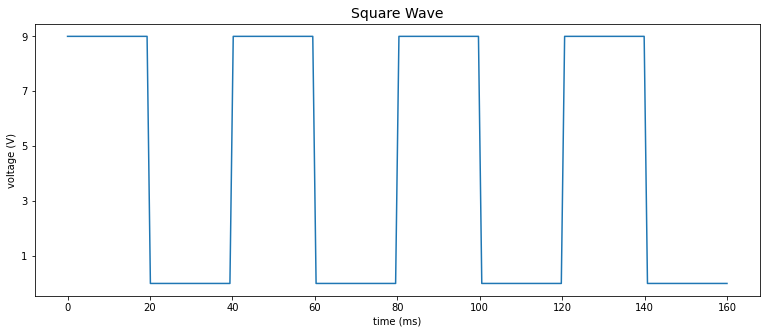

In [8]:
# Create figure and axes objects.
fig, ax = plt.subplots(figsize=(13, 5))
ax.set_title('Square Wave', size=14)
ax.set_xlabel('time (ms)')
ax.set_ylabel('voltage (V)')
ax.set_yticks([y for y in range(1, 10, 2)])

# Plot the square wave given by the function outlined in the cell above this one.
ax.plot(t*1000, E)

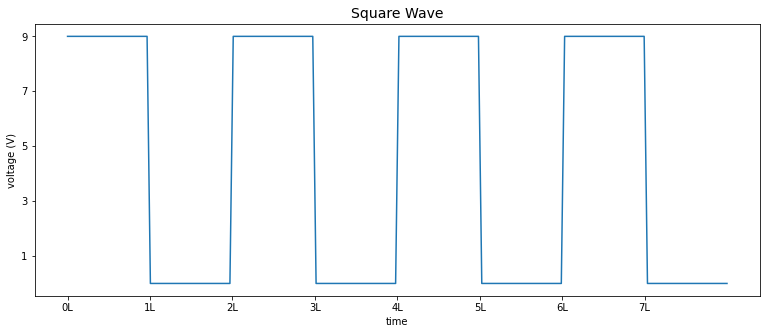

In [9]:
L = 20.0
ax.set_xlabel('time')
ax.set_xticks([L*i for i in range(cycles*2)], [str(i) + 'L' for i in range(cycles*2)])
fig

And now we plot the curve given by the Fourier Series up to, but not including, the $m$'th harmonic.  Said function, denoted as '$\mathrm{fs}(t)$', approximates the square wave shown above.

In [10]:
fs = F(6)
fs(0.055)

9.09161321240124

In [11]:
# Parametric Approximation

def F2(m: int, E = 9.0, f = 25.0):
    """This is a lambda (parametric) function that returns a function that 
    approximates the shifted square wave using every odd numbered harmonic up to 'm'.
    Parameters:
        E:  The magnitude or amplitude of the waveform;
        f:  The frequency."""
    
    # The angular velocity, denoted as 'w', of the waveform.
    w = 2*np.pi *f
    
    # Duration of a half-period.
    L = 1/(2*f)
    
    from math import sin
    
    return lambda t: E*(0.5 + 2/np.pi * sum((1/n * sin(n*w*(t-L)) for n in range(1, m, 2))))

In [12]:
fs2 = F2(6)
fs2(0.03)

9.465634224467134

## Non-Square Waves

Assuming $a \ne b$, our voltage signal will be rectangular but not a square wave.

### Quarter Duty Cycle

Assuming $3a = b$, the signal has a duty cycle of $25\mathrm{\%}$.

The Fourier Series is given by:
$$ \mathrm{f}(t) = \frac{a_0}{2} + \sum_{n=1}^\infty a_n \, \cos \frac{n \pi t}{L} + \sum_{n=1}^\infty b_n \, \sin \frac{n \pi t}{L}$$

Here, the **dc component** ($a_0$) is given by:
$$ a_0 = \frac{1}{L} \int_0^{0.5L} \mathrm{f}(t)\,\mathrm{d}t = 0.5E = 4.5\mathrm{V}$$

**The $a_n$ coefficients are given by:**
$$ a_n = \frac{1}{L} \int_0^{0.5L} \mathrm{f}(t) \cos \frac{n \pi t}{L} \,\mathrm{d}t = \frac{E}{L} \int_0^{0.5L}\cos \frac{n \pi t}{L} \,\mathrm{d}t $$

Let $g(t)$ be defined as:
$$ g(t) := \int \cos \frac{n\pi t}{L} \; \mathrm{d}t = \frac{L}{n\pi} \,\sin \frac{n \pi t}{L} + K$$

$$ g(0) = K$$

$$ g(0.5L) = K \quad \text{when }n\text{ is even.}$$

When $n$ is odd, $g(0.5L)$ get's a little trickier.

$$ g(0.5L) = \frac{L}{n\pi} + K \quad \text{when }n\in\{1, 5, 9, \dots\}$$

and,
$$ g(0.5L) = - \frac{L}{n\pi} + K \quad \text{when }n\in\{3,7,11,\dots\}$$

Thus,
$$ a_n = \frac{E}{L}\big(g(0.5L) - g(0)\big)$$

In [17]:
from math import cos, sin, pi

def a(n, E = 9, L = 0.02):
    return E/(n*pi)*sin(0.5*n*pi)

Which can be broken down into three general cases:

\begin{align*}
    a_n &= 0  \quad \hspace{3ex} \text{when }n\text{ is even.} \\ \\
    a_n &= \frac{E}{n\pi} \quad\hspace{1ex} \text{when }n\in\{1,5,9,\dots\} \\ \\
    a_n &= -\frac{E}{n\pi} \quad \text{when }n\in\{3,7,11,\dots\}
\end{align*}

**And the $b_n$ coefficients are given by:**
$$ b_n = \frac{E}{L}\int_0^{0.5L}\sin \frac{n \pi t}{L} \,\mathrm{d}t  $$

Let $g(t)$ be redefined as:
$$ g(t) := \int \sin \frac{n \pi t}{L}\,\mathrm{d}t = K - \frac{L}{n\pi}\,\cos\frac{n\pi t}{L}$$

The identity of $b_n$ can thus be rewritten as:  

$$ b_n = \frac{E}{L}\big(g(0.5L)-g(0)\big)$$

$$ g(0) = K - \frac{L}{n\pi}$$

$$ g(0.5L) = K \quad \text{when }n\text{ is odd.}$$

When $n$ is even:
$$ g(0.5L) = K - \frac{L}{n\pi} \quad \text{when }n\in\{4,8,12,\dots\}$$

$$ g(0.5L) = K + \frac{L}{n\pi} \quad \text{when }n\in\{2,6,10,\dots\}$$

In [15]:
def b(n, E = 9, L = 0.02):
    return E/(n*pi)*(1-cos(0.5*n*pi))

In [16]:
b(4)

0.0

Finally, we are left with three general cases for $b_n$.  

\begin{align*}
    b_n &= 0 \quad \hspace{2ex} \text{when }n\in\{4,8,12,\dots\} \\ \\
    b_n &= \frac{E}{n\pi} \quad \text{when }n\text{ is odd.} \\ \\
    b_n &= \frac{2E}{n\pi} \quad \text{when }n\in\{2,6,10,\dots\}
\end{align*}

**The Fourier Series** can thus be rewritten such that the two generic terms containing $a_n$ and $b_n$ as factors can be combined into one term with $C_n$ as a constant factor (the magnitude or amplitude) and a sine function with the same frequency as the two terms being combined through addition as the other factor.  

This can be acheived by first, converting the two terms into their complex number representation and performing complex addition on the rectangular form of the two complex numbers;  And then converting the result into it's polar form.  The magnitude of the result is equal to $C_n$ and the phase angle is equal to the phase shift of the aforementioned sine function.  This is possible because the two terms being added share the same frequency, which is equal to the fundamental frequency multiplied by $n$.

$$ \mathrm{f}(t) = \frac{a_0}{2} + \sum_{n=1}^\infty C_n\,\sin \left( \frac{n \pi t}{L} + \varphi_n\right)$$

Let $\theta$ be defined as:
$$ \theta := \theta(t):=\frac{n\pi t}{L} = n \cdot 2\pi ft = n \cdot \omega t$$

$$ a_n \, \cos \theta = a_n \sin \big(\theta + 0.5\pi\big) = a_n \angle 90^\circ = j \cdot a_n$$

$$ b_n \sin \theta = b_n\angle 0 = b_n$$

Remember that the right hand side of the above equation is the rectangular form of the complex number representation of the left hand side!

Thus, through complex number addition,
$$ a_n \cos \theta + b_n \sin \theta = b_n + j\cdot a_n = C_n \angle \varphi_n$$

where,
$$ C_n = \sqrt{a_n^2 + b_n^2}$$

and,
$$ \varphi_n = \arcsin \frac{a_n}{C_n}$$

There are four general cases to consider for both the magnitude and the phase angle of each harmonic.  

**First, we consider the magnitude.**

$$ C_n = \sqrt{2}\,\frac{E}{n\pi} \quad \text{when }n\in\{1,5,9,\dots\}$$

$$C_n = 2\,\frac{E}{n\pi} \quad\hspace{2ex} \text{when }n\in\{2,6,10,\dots\} $$

$$ C_n = \sqrt{2}\,\frac{E}{n\pi} \quad \text{when }n\in\{3,7,11,\dots\}$$

$$ C_n = 0 \quad \text{when }n\in\{4,8,12,\dots\}$$

The above can be reduced to three general cases.

$$ C_n = \frac{E}{n\pi} \cdot \begin{cases}
\sqrt{2} \quad &\text{if }n\text{ is odd.} \\
2  &\text{if }n\in\{2,6,10,\dots\} \\
0  &\text{if }n\in\{4,8,12,\dots\}
\end{cases}
$$

In [25]:
def C(n, E = 9, L = 0.02):
    return np.sqrt(a(n, E, L)**2 + b(n, E, L)**2)

### Generic Duty Cycle

Suppose our signal has a duty cycle of $X\mathrm{\%}$ and let $\alpha:=X\div 100$.  It then follows that the dc component ($a_0$) of the Fourier Series is given by:

$$ a_0 = \frac{1}{L}\,\int_0^p \mathrm{f}(t) \,\mathrm{d}t = \frac{E}{L}\,\int_0^{2\alpha L} 1\, \mathrm{d}t = 2\alpha E$$

**The $a_n$ coefficients are given by:**  

$$ a_n = \frac{E}{L}\,\int_0^{2\alpha L} \cos \frac{n \pi t}{L} \, \mathrm{d} t$$

Let $g(t)$ be defined as:
$$ g(t) := \int \cos \frac{n \pi t}{L} \,\mathrm{d}t = \frac{L}{n\pi}\sin\frac{n\pi t}{L} + K$$

The identity of $a_n$ can be rewritten as:  

$$ a_n = \frac{E}{L}\big(g(2\alpha L) - g(0)\big)$$

$$ g(0) = K$$

$$ g(2\alpha L) = \frac{L}{n\pi}$$

### Relation to Filters

Recall the rectangular waveform with a [duty cycle of $25\mathrm{\%}$](#Quarter-Duty-Cycle).  If we were to run this signal through a band pass filter that filtered out every harmonic frequency except the $4$'th, $8$'th, $12$'th, $\dots$ harmonic frequencies, then the amplitude of the voltage signal will approach the dc component ($0.5a_0$) of the Fourier Series as the strength of the filter increases.  Basically, the stronger the filter is, the closer the amplitude will be to $0.5a_0$.